词袋模型（Bag of Words Model，简称BoW）是自然语言处理（NLP）领域中一种非常基础且广泛使用的文本表示方法。该模型的核心思想是将文本简化为一个词的集合，不考虑词序和语法结构，只关注词的出现与否以及出现的频率。

### 词袋模型的基本特点

1. **忽略词序**：在词袋模型中，文本被表示为一个词的无序集合。这意味着模型不会考虑词在文本中的顺序，例如，“我喜欢吃苹果”和“苹果喜欢吃我”在词袋模型中被视为相同的文本。

2. **词频统计**：每个词在文本中出现的次数被记录下来，并作为该词在文本中的重要性的度量。通常，词频会进行归一化处理，以消除文本长度的影响。

3. **词汇表构建**：在对多个文本进行建模时，首先需要构建一个共享的词汇表，该词汇表包含了所有文本中出现的不同词。每个文本随后被表示为一个向量，向量中的每个元素对应于词汇表中的一个词，元素的值表示该词在文本中的频率。

### 词袋模型的文本表示

在词袋模型中，文本被转换为一个高维空间中的稀疏向量。例如，假设我们有一个简单的词汇表{"我", "喜欢", "吃", "苹果"}，如果有两句话：“我喜欢吃苹果”和“我喜欢吃香蕉”，那么这两句话在词袋模型中的表示如下：

- “我喜欢吃苹果”：[1, 1, 1, 1]
- “我喜欢吃香蕉”：[1, 1, 1, 0]

这里，向量的每个元素对应于词汇表中的一个词，元素的值表示该词在文本中出现的次数。对于不在词汇表中的词（如“香蕉”），其在表示向量中的对应位置为0。

### 词袋模型的应用

词袋模型因其简单性和易于实现的特点，在NLP的多个领域中得到了广泛应用，包括但不限于：

- **文本分类**：词袋模型可以用于情感分析、垃圾邮件检测、主题分类等任务。
- **信息检索**：在搜索引擎中，词袋模型可以用来评估查询词与文档的相关性。
- **主题建模**：尽管词袋模型不考虑词序，但它可以与其他算法（如LDA）结合使用，来发现文本集合中的主题。

### 词袋模型的局限性

尽管词袋模型在实践中非常有效，但它也有一些明显的局限性：

- **忽略语序**：词袋模型无法捕捉词序带来的语义信息，这可能会导致模型丢失重要的上下文信息。
- **无法处理同义词和多义词**：由于模型只关注词的出现，而不关注词的具体含义，因此无法区分同义词和多义词。
- **稀疏性问题**：在大规模文本数据集中，词汇表可能非常庞大，导致向量维度很高，这会造成稀疏性问题，并可能影响计算效率和模型性能。

尽管存在这些局限性，词袋模型仍然是自然语言处理中一个非常有用的工具，尤其是在处理大规模文本数据时。此外，词袋模型也是许多更复杂文本表示方法的基础，如TF-IDF、Word2Vec、BERT等。

In [10]:
# 数据表
import pandas as pd

# 数组运算
import  numpy as np

# 英文语料处理
import nltk

# 正则表达式（用于数据清洗）
import re

import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

# 词袋模型自然语言处理
from sklearn.feature_extraction.text import CountVectorizer

# TF-IDF自然语言处理
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# 导入数据
text_twi = pd.read_csv(r'text_analysis_twitter.csv')
text_twi = text_twi.drop(['Unnamed: 0'], axis=1)

In [6]:
text_twi

,id,screen_name,time,link,text,source
0,881004944714866688,KamalaHarris,2017-07-01T00:22:01-04:00,https://www.twitter.com/KamalaHarris/statuses/...,Republicans are trying to steal health care fr...,Sprout Social
1,881002538341986304,MarcVeasey,2017-07-01T00:12:28-04:00,https://www.twitter.com/kylegriffin1/statuses/...,RT @kylegriffin1 Rep. Mark Veasay has introduc...,Twitter for Android
2,881001393284419584,RepPaulTonko,2017-07-01T00:07:55-04:00,https://www.twitter.com/RepPaulTonko/statuses/...,A top U.S. science office went dark tonight. N...,Twitter for iPhone
3,881000301007958016,clairecmc,2017-07-01T00:03:34-04:00,https://www.twitter.com/clairecmc/statuses/881...,So the fundraising quarter ends in an hour in ...,Twitter for iPad
4,881015727540637696,tedcruz,2017-07-01T01:04:52-04:00,https://www.twitter.com/larry_kudlow/statuses/...,RT @larry_kudlow Important story @SenTedCruz @...,Twitter for iPhone
...,...,...,...,...,...,...
299995,939743413909549056,RepTedLieu,2017-12-10T01:27:44-05:00,https://www.twitter.com/ReadyLA/statuses/93956...,RT @ReadyLA REPORT FIRE DAMAGE from #CreekFire...,Twitter for iPhone
299996,939743003203301376,RepTedLieu,2017-12-10T01:26:06-05:00,https://www.twitter.com/LAFDtalk/statuses/9397...,RT @LAFDtalk Once a wildfire has burned throug...,Twitter for iPhone
299997,939741567706730497,JuliaBrownley26,2017-12-10T01:20:23-05:00,https://www.twitter.com/SCE/statuses/939739240...,"RT @SCE Update: As of 8:30pm, Saturday, about ...",Twitter Web Client
299998,939739240501596160,SteveKnight25,2017-12-10T01:11:09-05:00,https://www.twitter.com/santaclarita/statuses/...,RT @santaclarita #RyeFire Evening Update (12/9...,Twitter for iPhone


In [5]:
# 观察text列
text_list = list(text_twi['text'])
text_list[:5]

['Republicans are trying to steal health care from 22 million people in order to help the wealthiest 0.4%.',
 "RT @kylegriffin1 Rep. Mark Veasay has introduced a bill to ensure no taxpayer funds will be used to support Trump's Election Commission. http://pbs.twimg.com/media/DDm3PgaXcAAFBIo.jpg",
 'A top U.S. science office went dark tonight. Not good. #sciencematters https://twitter.com/elleabella1112/status/880870684485984256 QT @elleabella1112 science division out. mic drop. http://pbs.twimg.com/media/DDl7NT9XoAEeJxb.jpg',
 'So the fundraising quarter ends in an hour in MO. I would really appreciate a $5 contribution. Thank you so much. http://clairemccaskill.com/donate',
 'RT @larry_kudlow Important story @SenTedCruz @NRO. http://www.nationalreview.com/article/449134/ted-cruz-conservative-health-care-proposal?utm_campaign=trueanthem&utm_content=595717ee04d3010ccd0c715e&utm_medium=social&utm_source=twitter']

In [7]:
# 从NLTK库下载一些预训练的数据集和模型

# 将文本划分为句子
nltk.download('punkt')

# 停用词
nltk.download('stopwords')

# wordnet是一个大型的英语词汇数据库，它提供了词之间的多种语义关系，如同义词、反义词、上位词等。在NLTK中，wordnet资源常用于词义消歧、同义词替换、语义分析等任务。
nltk.download('wordnet')

# 词性标注（如名词、动词、形容词等）
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\River
[nltk_data]     Phoenix.LAPTOP-PS8GAOTQ\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\River
[nltk_data]     Phoenix.LAPTOP-PS8GAOTQ\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\River
[nltk_data]     Phoenix.LAPTOP-PS8GAOTQ\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\River Phoenix.LAPTOP-
[nltk_data]     PS8GAOTQ\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [11]:
def preprocess_text(text):
    # 小写
    text = text.lower()
    
    # 用空字符串替换http后面的连续非空字符串，即删除url
    text = re.sub(r'http\S+', '',text)
    
    # 分词
    tokens = word_tokenize(text)
    
    # 去除停用词
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    
    # 去除标点符号和数字 和其他一些字符
    filtered_tokens = [word for word in filtered_tokens if word.isalpha() and word !='rt']
    #filtered_tokens = [word for word in filtered_tokens if word not in string.punctuation]
    
    # 词性标注与筛选
    #pos_tags = pos_tag(filtered_tokens)
    #selected_tokens = [word  for word, pos in pos_tags if pos.startswith('N') or pos.startswith('J') or pos.startswith('V')]
    
    # 词性还原
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
  
    # 返回预处理后的文本
    return ' '.join(lemmatized_tokens)


# 定义函数将词性标签映射到 WordNet 词性标签
# def get_wordnet_pos(treebank_tag):
#     if treebank_tag.startswith('J'):
#         return 'a'  # 形容词
#     elif treebank_tag.startswith('V'):
#         return 'v'  # 动词
#     elif treebank_tag.startswith('N'):
#         return 'n'  # 名词
#     else:
#         return None  # 默认为名词

text_twi['text_clean'] = text_twi['text'].apply(preprocess_text)

In [12]:
text_clean = list(text_twi['text_clean'])
text_clean[:10]

['republican trying steal health care million people order help wealthiest',
 'mark veasay introduced bill ensure taxpayer fund used support trump election commission',
 'top science office went dark tonight good sciencematters qt science division mic drop',
 'fundraising quarter end hour mo would really appreciate contribution thank much',
 'important story sentedcruz nro',
 'threat already higher resist',
 'happy birthday senjoniernst',
 'read reploucorrea article one california finest officer achieving american dream heretostay',
 'airandspace year ago today official ribbon cutting museum dc triggered spacecraft orbiting mar',
 'great job daylen littleleague baseball esva qt eastern shore little league player invited national mlb event']

In [13]:
# 计算词频

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text_clean)

# 获得词汇表
feature_words = vectorizer.get_feature_names_out()

word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('amp', 65502),
 ('qt', 35691),
 ('tax', 32961),
 ('today', 24415),
 ('american', 21801),
 ('bill', 21156),
 ('trump', 19421),
 ('family', 18268),
 ('need', 15323),
 ('health', 14042),
 ('house', 13537),
 ('great', 13409),
 ('people', 13404),
 ('help', 13143),
 ('must', 12525),
 ('act', 12330),
 ('time', 11775),
 ('care', 11704),
 ('thank', 11515),
 ('work', 11236),
 ('new', 10994),
 ('senate', 10738),
 ('congress', 10587),
 ('would', 10556),
 ('day', 10506),
 ('job', 10469),
 ('plan', 10422),
 ('year', 10403),
 ('support', 10170),
 ('cut', 10119),
 ('gop', 10052),
 ('make', 9958),
 ('vote', 9718),
 ('get', 9622),
 ('state', 9289),
 ('one', 9284),
 ('republican', 8796),
 ('realdonaldtrump', 8591),
 ('community', 8497),
 ('right', 8127),
 ('taxreform', 8020),
 ('president', 8012),
 ('reform', 7978),
 ('potus', 7816),
 ('million', 7682),
 ('see', 7654),
 ('thanks', 7604),
 ('country', 7600),
 ('working', 7305),
 ('live', 7185),
 ('woman', 7130),
 ('proud', 7123),
 ('watch', 7025),
 ('am

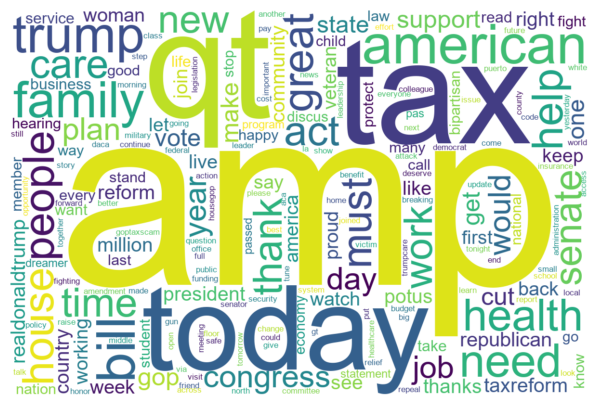

In [14]:
# 词云图
wordcloud = WordCloud(width=1200, height=800, background_color='white', font_path='arial.ttf').generate_from_frequencies(word_freq)

# 可视化
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
#plt.savefig('wordcloud_twi.png', dpi=100)